### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

### Configuration

In [53]:
EXPERIMENT = "tara"
MODE = "train"
ACTIVITIES = ["relaxing", "eating", "walking", "studying"]
simple_distance_based_outlier_columns = [
    'accel_z', 'accel_y', 'accel_x',
    'gyro_z', 'gyro_y', 'gyro_x',
    'magne_z', 'magne_y', 'magne_x',
]
local_outlier_factor_columns = [
    'gps_altitude', 'gps_latitude', 'gps_longitude',
    'gravity_z', 'gravity_y', 'gravity_x',
    'bar_relativeAltitude', 'bar_pressure',
    'ori_qz', 'ori_qy', 'ori_qx', 'ori_qw'
]

### Dataset

In [54]:
dataset: pd.DataFrame = pd.read_csv(f"datasets/{EXPERIMENT}_{MODE}.csv")
dataset

,accel_z,accel_y,accel_x,gyro_z,gyro_y,gyro_x,gravity_z,gravity_y,gravity_x,ori_qz,...,bar_relativeAltitude,bar_pressure,gps_altitude,gps_latitude,gps_longitude,time,relaxing,eating,walking,studying
0,-0.170119,0.161832,0.227087,-0.106231,0.010597,-0.084743,-7.913668,-5.737212,0.255096,-0.680946,...,0.348789,1017.477798,41.531347,52.045377,4.384529,2023-06-08 10:02:22.428471800,1,0,0,0
1,-0.013682,0.035644,-0.121006,0.063131,-0.017078,0.058775,-8.082583,-5.502527,-0.606385,-0.702423,...,0.364643,1017.475510,41.680638,52.045386,4.384549,2023-06-08 10:02:23.428471800,1,0,0,0
2,-0.010919,0.023102,0.010215,-0.020131,0.028427,-0.066613,-8.030929,-5.606764,-0.185498,-0.683085,...,0.385780,1017.473145,41.680506,52.045390,4.384558,2023-06-08 10:02:24.428471800,1,0,0,0
3,-0.001532,0.016153,-0.022530,-0.040057,0.022515,0.068452,-8.263604,-5.239394,-0.517118,-0.702382,...,0.391064,1017.472839,41.747784,52.045390,4.384556,2023-06-08 10:02:25.428471800,1,0,0,0
4,-0.031619,0.024387,0.006676,-0.016860,-0.112503,0.110842,-7.518719,-6.229657,-0.477621,-0.695890,...,0.391064,1017.472839,41.723107,52.045389,4.384561,2023-06-08 10:02:26.428471800,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,-0.021761,0.002616,0.002799,0.000822,-0.002059,0.015809,0.609068,-9.656272,-1.598371,0.001219,...,20.419849,1015.060806,41.477542,52.045441,4.384580,2023-06-08 16:02:13.428471800,1,0,0,0
21592,0.014316,0.002327,-0.003718,0.014287,0.011617,0.026606,0.848866,-9.622351,-1.686895,-0.002057,...,20.430418,1015.059662,41.477542,52.045441,4.384580,2023-06-08 16:02:14.428471800,1,0,0,0
21593,0.009734,0.003723,-0.005396,-0.012023,-0.035512,0.037696,1.123775,-9.595271,-1.669564,0.000391,...,NaN,NaN,41.486357,52.045444,4.384573,2023-06-08 16:02:15.428471800,1,0,0,0
21594,-0.001886,0.009764,0.005781,-0.012753,-0.005079,-0.044107,1.032805,-9.629271,-1.538645,0.010899,...,NaN,NaN,NaN,NaN,NaN,2023-06-08 16:02:16.428471800,1,0,0,0


### Visualization

#### Overview

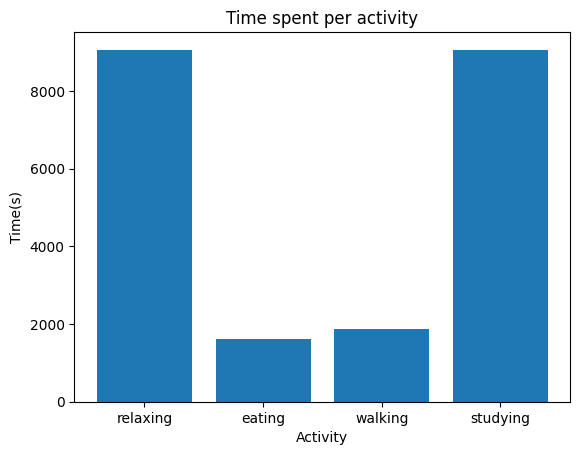

In [35]:
activities_count: pd.DataFrame = pd.DataFrame(
    dataset[ACTIVITIES].sum(),
    columns=['Sum']
)

plt.bar(activities_count.index, activities_count['Sum'])
plt.xlabel('Activity')
plt.ylabel('Time(s)')
plt.title('Time spent per activity')
plt.show()

#### Accelerometer

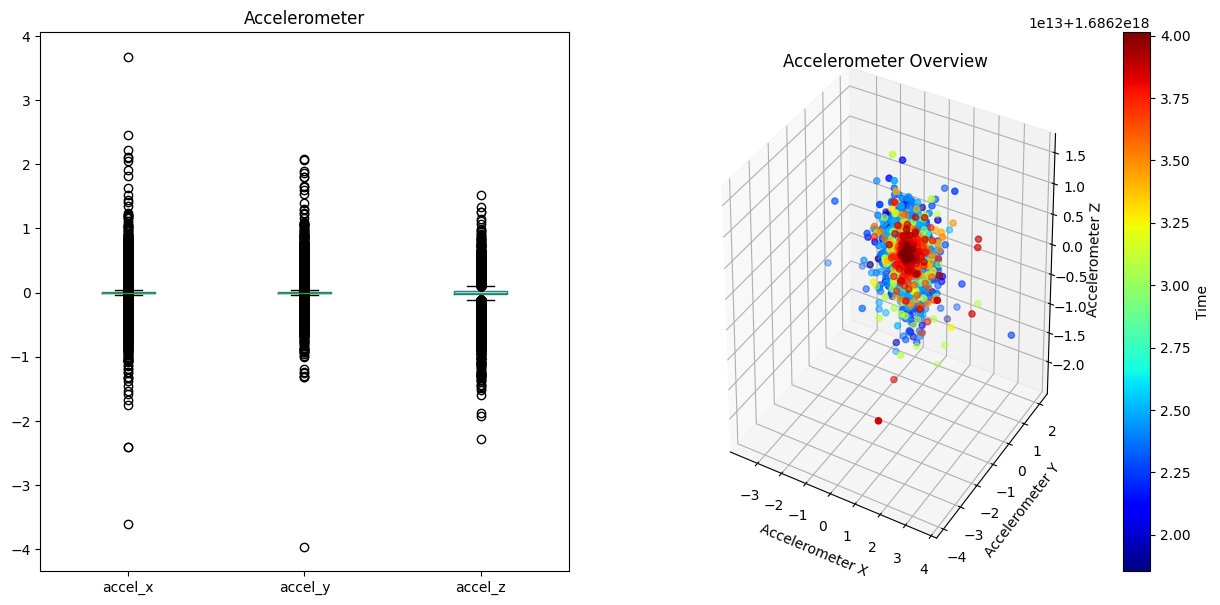

In [36]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# -------- Box plot
dataset[['accel_x', 'accel_y', 'accel_z']].plot.box(ax=ax1)
ax1.set_title("Accelerometer")

# -------- Scatter plot
sc = ax2.scatter(
    dataset['accel_x'],
    dataset['accel_y'],
    dataset['accel_z'],
    c=pd.to_datetime(dataset['time']).astype(int),
    cmap=cm.jet
)
ax2.set_xlabel('Accelerometer X')
ax2.set_ylabel('Accelerometer Y')
ax2.set_zlabel('Accelerometer Z')
ax2.set_title('Accelerometer Overview')
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Time')
plt.show()

#### Gravity

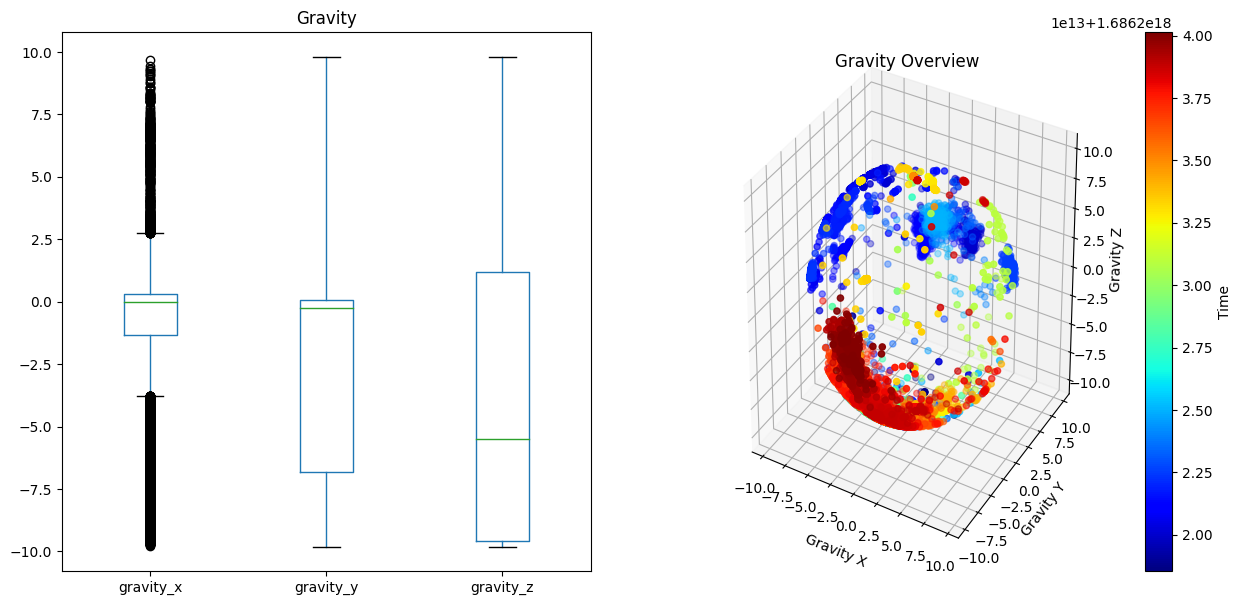

In [37]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# -------- Box plot
dataset[['gravity_x', 'gravity_y', 'gravity_z']].plot.box(ax=ax1)
ax1.set_title("Gravity")

# -------- Scatter plot
sc = ax2.scatter(
    dataset['gravity_x'],
    dataset['gravity_y'],
    dataset['gravity_z'],
    c=pd.to_datetime(dataset['time']).astype(int),
    cmap=cm.jet
)
ax2.set_xlabel('Gravity X')
ax2.set_ylabel('Gravity Y')
ax2.set_zlabel('Gravity Z')
ax2.set_title('Gravity Overview')
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Time')
plt.show()

#### Gyroscope

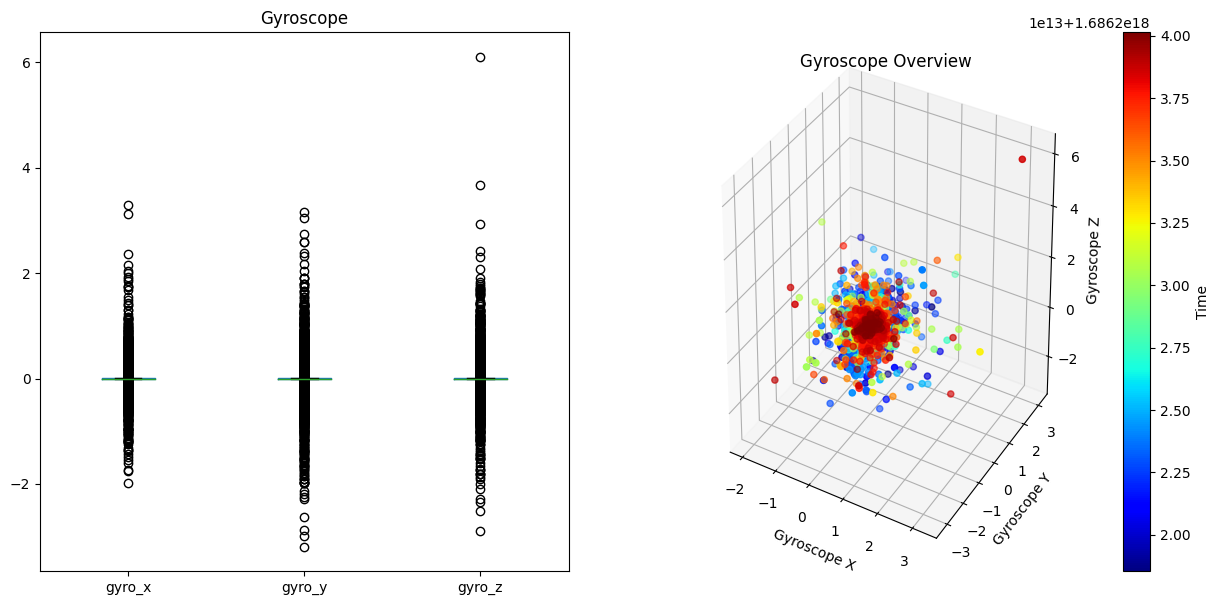

In [10]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# -------- Box plot
dataset[['gyro_x', 'gyro_y', 'gyro_z']].plot.box(ax=ax1)
ax1.set_title("Gyroscope")

# -------- Scatter plot
sc = ax2.scatter(
    dataset['gyro_x'],
    dataset['gyro_y'],
    dataset['gyro_z'],
    c=pd.to_datetime(dataset['time']).astype(int),
    cmap=cm.jet
)
ax2.set_xlabel('Gyroscope X')
ax2.set_ylabel('Gyroscope Y')
ax2.set_zlabel('Gyroscope Z')
ax2.set_title('Gyroscope Overview')
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Time')
plt.show()

#### Orientation

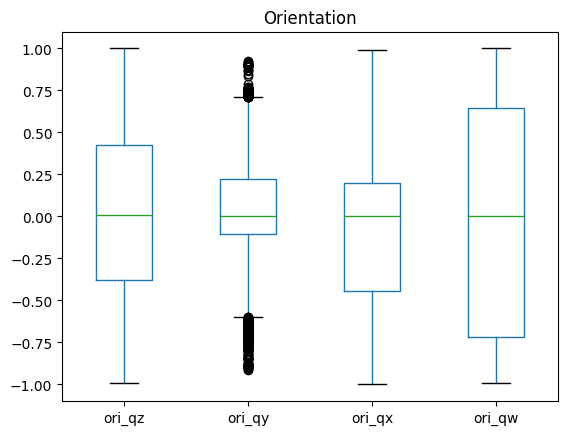

In [38]:
plt.Figure()
dataset[["ori_qz", "ori_qy", "ori_qx", "ori_qw"]].plot.box()
plt.title("Orientation")
plt.show()

#### Magnetometer

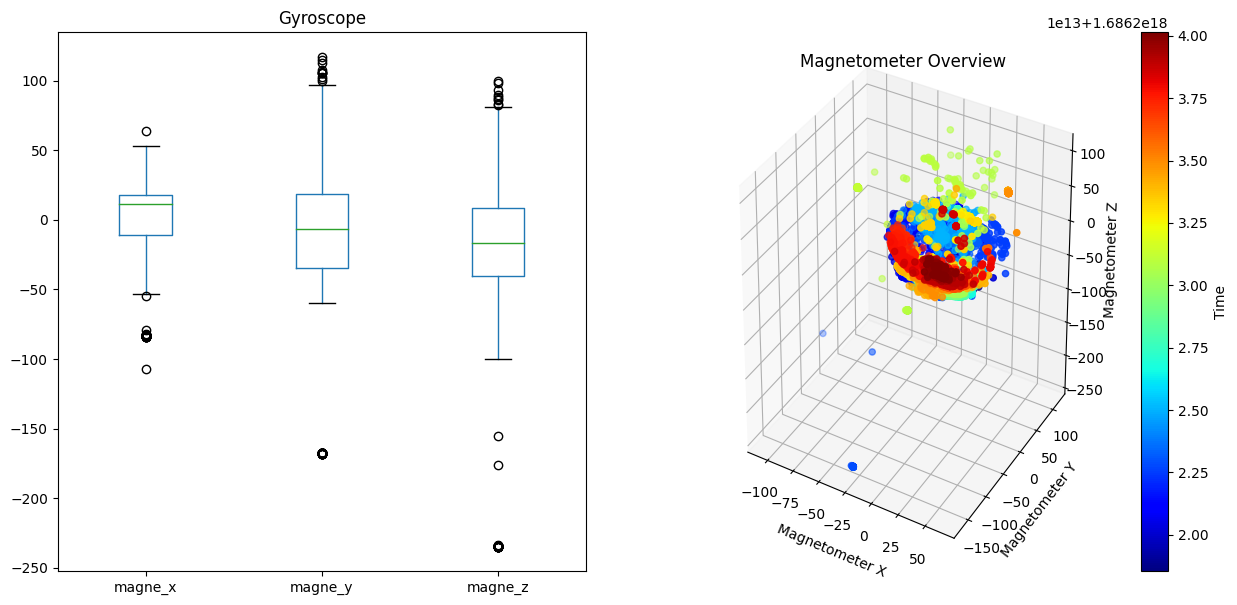

In [39]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# -------- Box plot
dataset[['magne_x', 'magne_y', 'magne_z']].plot.box(ax=ax1)
ax1.set_title("Gyroscope")

# -------- Scatter plot
ax2.scatter(
    dataset['magne_x'],
    dataset['magne_y'],
    dataset['magne_z'],
    c=pd.to_datetime(dataset['time']).astype(int),
    cmap=cm.jet
)
ax2.set_xlabel('Magnetometer X')
ax2.set_ylabel('Magnetometer Y')
ax2.set_zlabel('Magnetometer Z')
ax2.set_title('Magnetometer Overview')
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Time')
plt.show()

#### Barometer

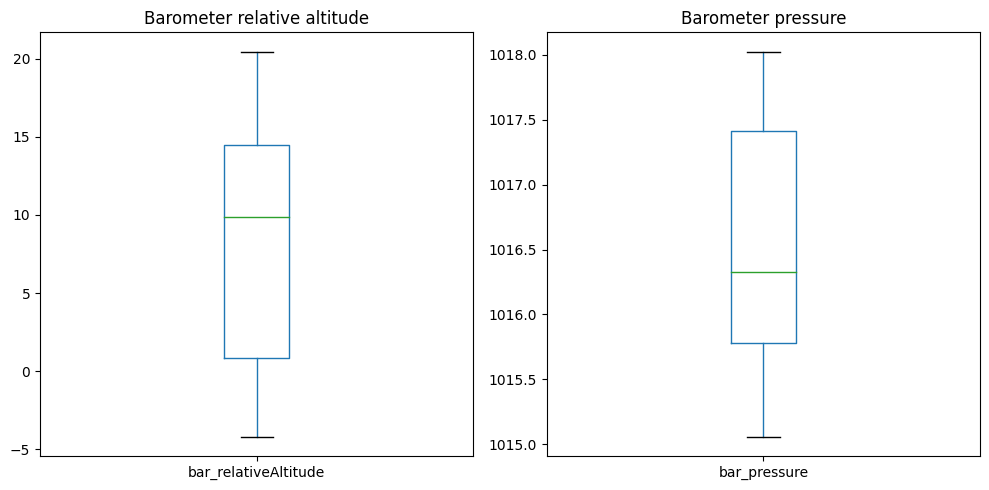

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

dataset[["bar_relativeAltitude"]].plot.box(ax=axes[0])
axes[0].set_title("Barometer relative altitude")

dataset[["bar_pressure"]].plot.box(ax=axes[1])
axes[1].set_title("Barometer pressure")

plt.tight_layout()
plt.show()

#### Location

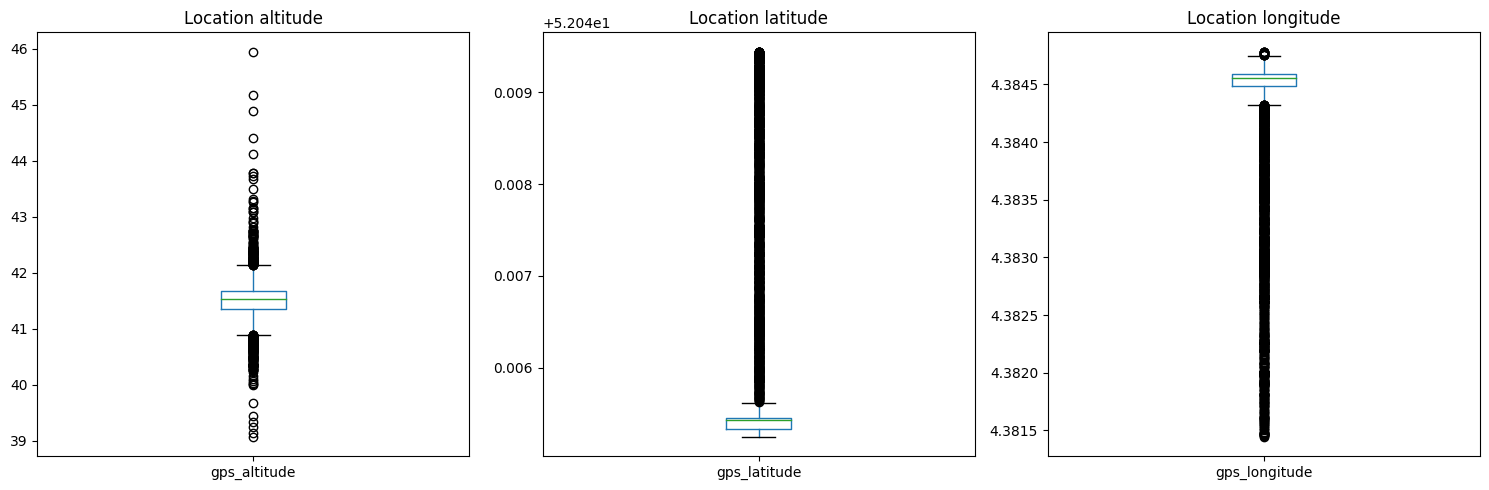

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

dataset[["gps_altitude"]].plot.box(ax=axes[0])
axes[0].set_title("Location altitude")

dataset[["gps_latitude"]].plot.box(ax=axes[1])
axes[1].set_title("Location latitude")

dataset[["gps_longitude"]].plot.box(ax=axes[2])
axes[2].set_title("Location longitude")

plt.tight_layout()
plt.show()

### Outlier removal

In [51]:
def print_missing_values_percentages(dataset: pd.DataFrame):
    columns = dataset.columns
    nan_percentages_per_column = []
    for column in columns:
        
        nan_values = dataset[column].isnull().sum()
        
        total_values = dataset.shape[0]
        
        percentage = (nan_values / total_values) * 100
        nan_percentages_per_column.append(
            percentage
        )

    sns.barplot(y=nan_percentages_per_column, x=dataset.columns)
    plt.xticks(rotation=90, size=6)
    plt.tight_layout()
    plt.show()

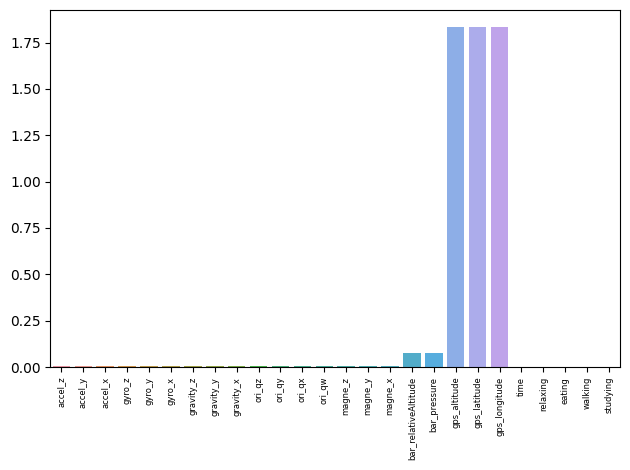

In [56]:
print_missing_values_percentages(dataset)

#### Simple distance based outlier detection

In [55]:
from book.Chapter3.OutlierDetection import DistanceBasedOutlierDetection

d_min = 0.1
f_min = 0.99

OutlierDist = DistanceBasedOutlierDetection()
for col in simple_distance_based_outlier_columns:
    try:
        dataset = OutlierDist.simple_distance_based(
            dataset, [col], 'euclidean', d_min, f_min)
        dataset.loc[dataset['simple_dist_outlier'] == True, col] = None
    except MemoryError as e:
        print(
            'Not enough memory available for simple distance-based outlier detection...')
        print('Skipping.')
dataset = dataset.drop('simple_dist_outlier', axis=1)

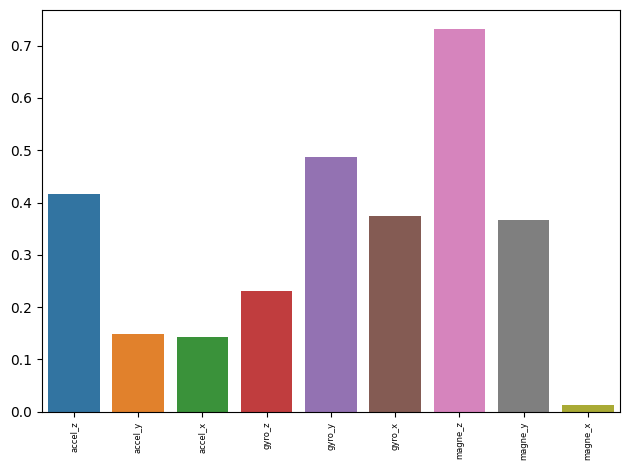

In [52]:
print_missing_values_percentages(dataset[simple_distance_based_outlier_columns])

#### Local outlier factor detection

In [59]:
from book.Chapter3.OutlierDetection import DistanceBasedOutlierDetection

k = 4

OutlierDist = DistanceBasedOutlierDetection()
for col in local_outlier_factor_columns:
    try:
        
        dataset = OutlierDist.local_outlier_factor(
            dataset, [col], 'euclidean', k
        )
        dataset.loc[dataset['lof'] == True, col] = None
    except MemoryError as e:
        print(
            'Not enough memory available for local outlier factor detection...'
        )
        print('Skipping.')
dataset = dataset.drop('lof', axis=1)

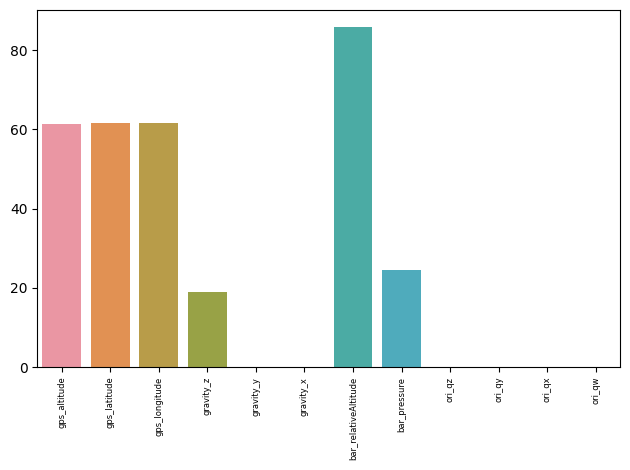

In [60]:
print_missing_values_percentages(dataset[local_outlier_factor_columns])

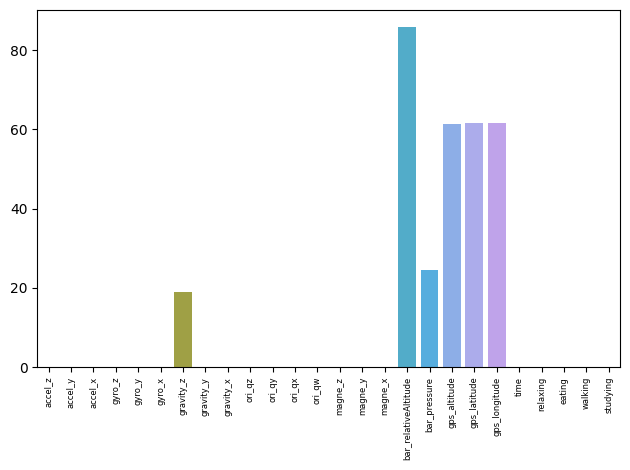

In [61]:
# simple distance based ~ 5 min
# local outlier factor ~ 133 min
# saving the state for faster further experimentation
print_missing_values_percentages(dataset)
dataset.to_csv(f"state/{EXPERIMENT}_{MODE}_outliers_removed.csv", index=False)